In [1]:
from nyctviz.station_mapper import StationMapper


In [2]:
help(StationMapper)


Help on class StationMapper in module nyctviz.station_mapper:

class StationMapper(builtins.object)
 |  Produce maps on the New York City Transit routes and stations (represented by a circle of the specificed size).
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize a mapper of NYC boroughs, subway routes, and stations.
 |  
 |  draw(self, fig=None, ax=None, sizes={}, colors={}, route_list=[], location_list=[], location_labels={}, location_label_options={}, zoom=False)
 |      Draw a basemap with subway routes, and represent data about each station with a disc of the specified size.
 |      
 |      `fig`, `ax` (optional) : 
 |          A figure and axes in which to plot 
 |      
 |      `sizes` (optional) :
 |          A dictionary of marker areas (keyed by location_id), as numerical values.
 |      
 |      `colors` (optional) :
 |          A dictionary of marker colors (keyed by location_id), as strings.
 |      
 |      `route_list` (optional) :
 |          

# Example 1


In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline


In [4]:
mapper = StationMapper()
locations = mapper.locations


**Draw blank map of network:**


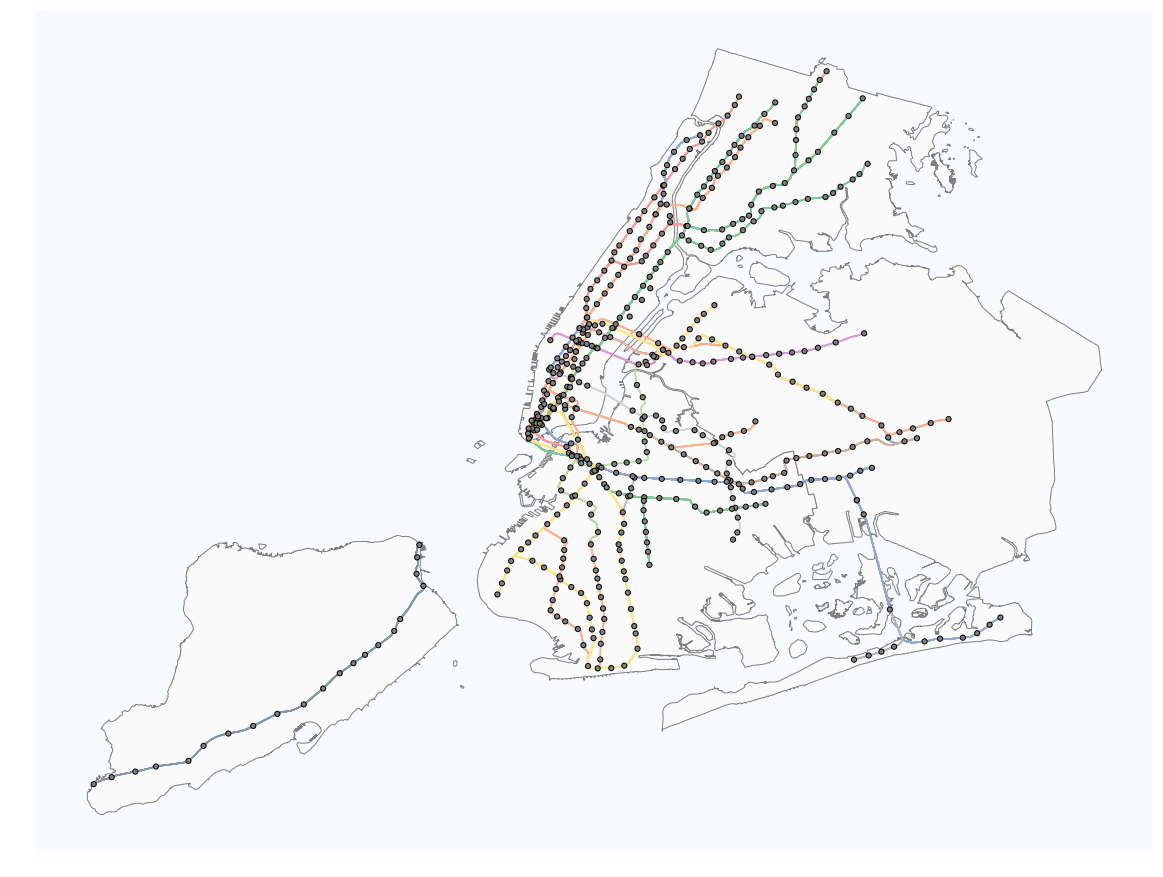

In [5]:
fig = mapper.draw()


**Draw specific stations:**


In [6]:
location_labels = locations.set_index(['location_id']).loc[['101','103','106','107','108']]['location_name'].to_dict()
location_labels


{'101': 'Van Cortlandt Park - 242 St',
 '103': '238 St',
 '106': 'Marble Hill - 225 St',
 '107': '215 St',
 '108': '207 St'}

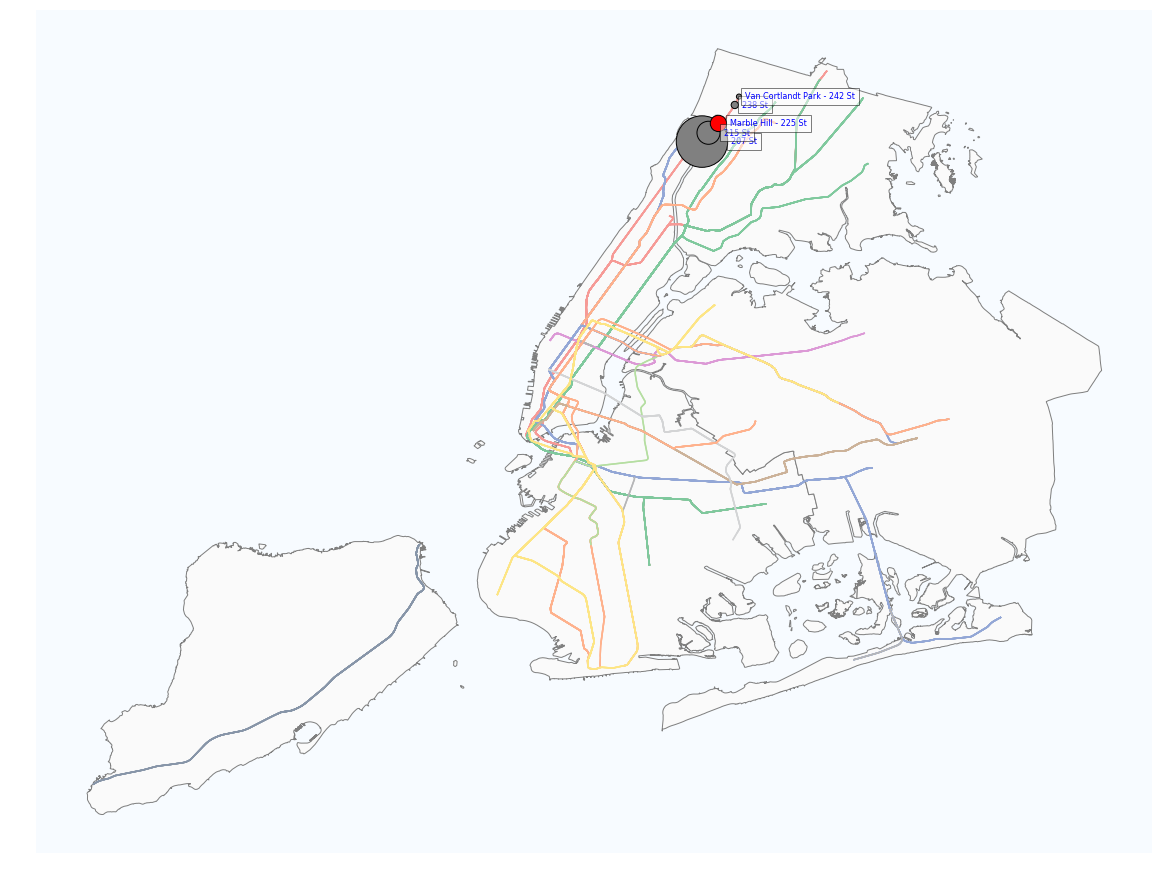

In [7]:
#fig,ax = plt.subplots(1,1,figsize=(20,20))
fig = mapper.draw(
    sizes={'101':1,'103':2,'106':10,'107':20,'108':100},
    colors={'106':'red'},
    location_labels=location_labels,
    location_label_options={'color':'blue'},
)


In [8]:
fig.data.head(10)

,location_id,lon,lat,area,radius,color,label
0,108,-73.918822,40.864621,100,5.641896,gray,207 St
1,107,-73.915279,40.869444,20,2.523133,gray,215 St
2,106,-73.909831,40.874561,10,1.784124,red,Marble Hill - 225 St
3,103,-73.900870,40.884667,2,0.797885,gray,238 St
4,101,-73.898583,40.889248,1,0.564190,gray,Van Cortlandt Park - 242 St
5,G19,-73.920740,40.756879,0,0.000000,gray,
6,G13,-73.882017,40.742454,0,0.000000,gray,
7,G14,-73.891338,40.746644,0,0.000000,gray,
8,G15,-73.898453,40.749669,0,0.000000,gray,
9,G16,-73.906006,40.752885,0,0.000000,gray,


**Draw specific route:**


In [9]:
df = locations[['1' in route_ids for route_ids in locations['route_id']]]
df = df.set_index(['location_id'])[['location_name']]
df['size'] = 0.5
df.head()


,location_name,size
location_id,,
101,Van Cortlandt Park - 242 St,0.5
103,238 St,0.5
104,231 St,0.5
106,Marble Hill - 225 St,0.5
107,215 St,0.5


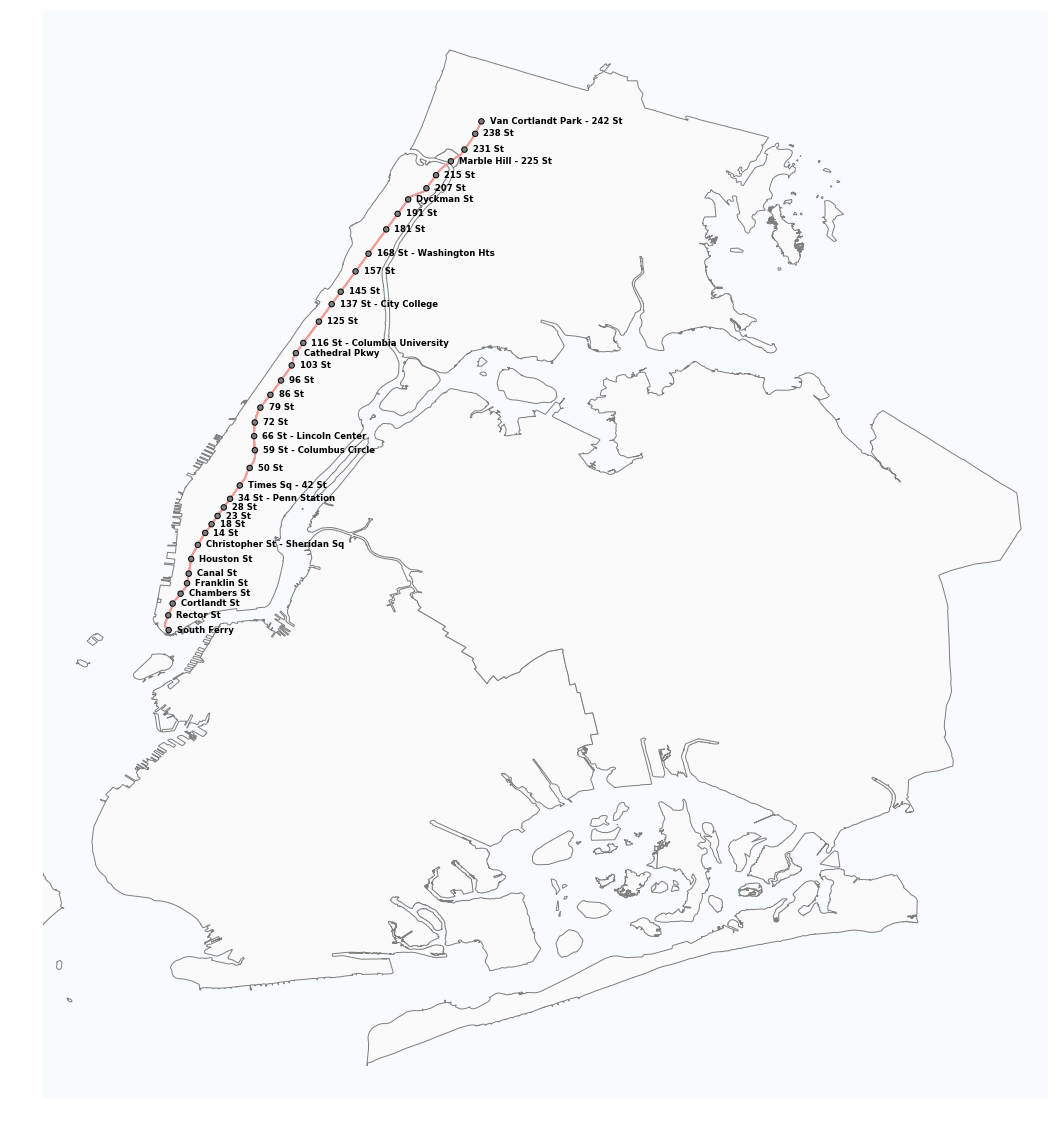

In [10]:
fig = mapper.draw(
    sizes=df['size'].to_dict(),
    route_list=['1'],
    location_list=df.index,
    location_labels=True,
    location_label_options={'bbox':{'alpha':0},'fontsize':8.5,'color':'black','fontweight':'bold'},
    zoom=True,
)
